<a href="https://colab.research.google.com/github/ma23m020Snehal/Flight-Price-Prediction/blob/main/flight_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace 'data.csv' with your dataset)
data = pd.read_csv('fpa1_data.csv')

In [ ]:
data.head()

,airline,source_city,stops,destination_city,class,days_left,price
0,GO_FIRST,Delhi,zero,Mumbai,Economy,1,5954
1,GO_FIRST,Delhi,zero,Mumbai,Economy,1,5954
2,Indigo,Delhi,zero,Mumbai,Economy,1,5955
3,Indigo,Delhi,zero,Mumbai,Economy,1,5955
4,Indigo,Delhi,zero,Mumbai,Economy,1,5955


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300140 entries, 0 to 300139
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300140 non-null  object
 1   source_city       300140 non-null  object
 2   stops             300140 non-null  object
 3   destination_city  300140 non-null  object
 4   class             300140 non-null  object
 5   days_left         300140 non-null  int64 
 6   price             300140 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 16.0+ MB


In [ ]:
data.describe()

,days_left,price
count,300140.000000,300140.000000
mean,26.005354,20889.559042
std,13.560334,22697.306218
min,1.000000,1105.000000
25%,15.000000,4783.000000
50%,26.000000,7425.000000
75%,38.000000,42521.000000
max,49.000000,123071.000000


In [ ]:
data.corr().T

<ipython-input-100-e688ef74ff4b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().T


,days_left,price
days_left,1.000000,-0.092044
price,-0.092044,1.000000


In [ ]:
data.shape

(300140, 7)

In [ ]:
data.airline.value_counts()

Vistara      127851
Air_India     80892
Indigo        43120
GO_FIRST      23171
AirAsia       16097
SpiceJet       9009
Name: airline, dtype: int64

<ipython-input-103-6787029d95fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['airline'],palette='hls')


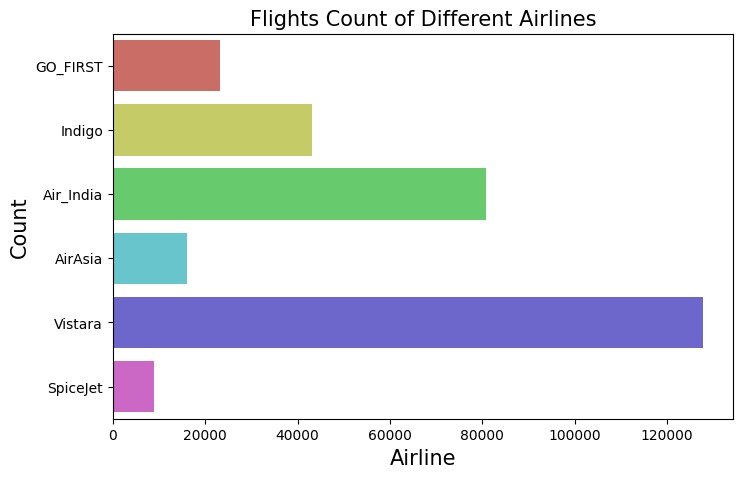

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [ ]:
data['class'].value_counts()

Economy     206656
Business     93484
Name: class, dtype: int64

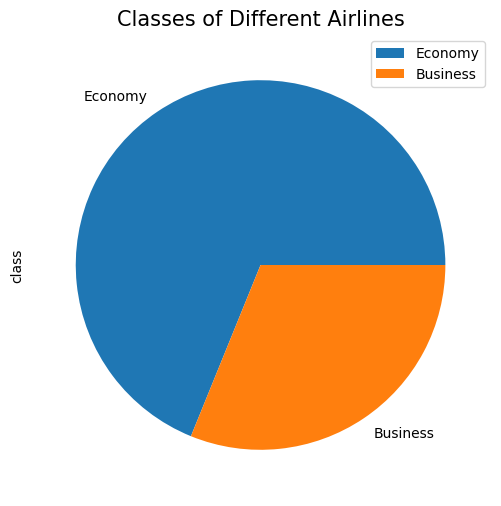

In [ ]:
plt.figure(figsize=(8,6))
data['class'].value_counts().plot(kind='pie')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

<ipython-input-106-9f8ae719321c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['airline'],y=data['price'],palette='hls')


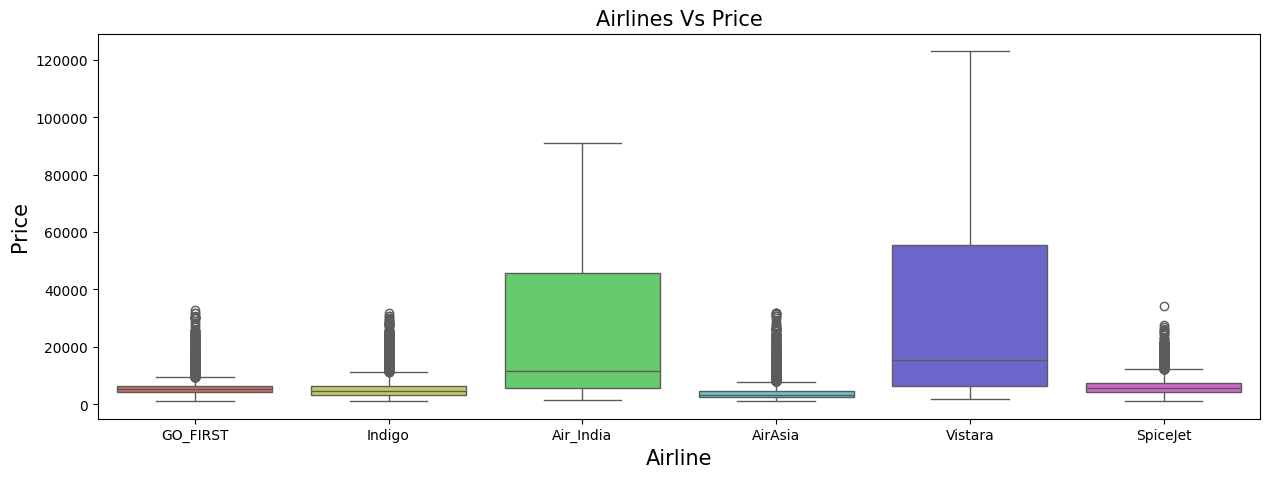

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data['airline'],y=data['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<ipython-input-107-801a4385a416>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class',y='price',data=data,palette='hls')


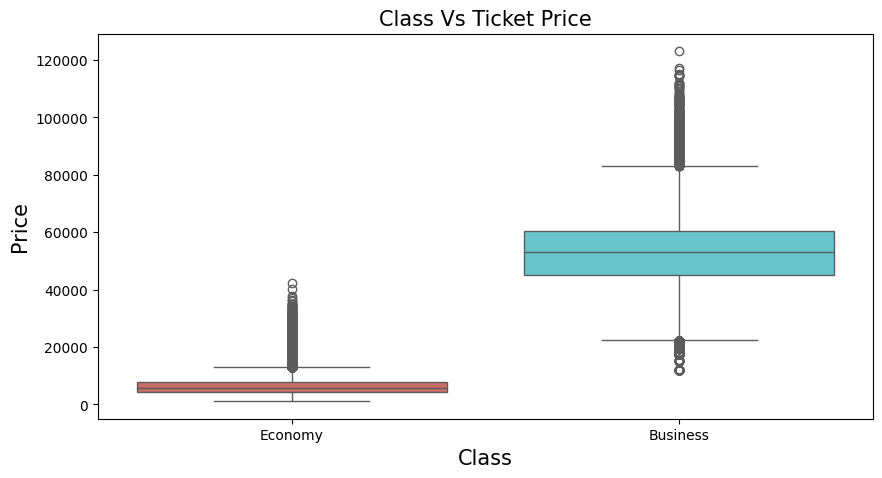

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=data,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<ipython-input-108-c1518baf6f69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stops',y='price',data=data,palette='hls')


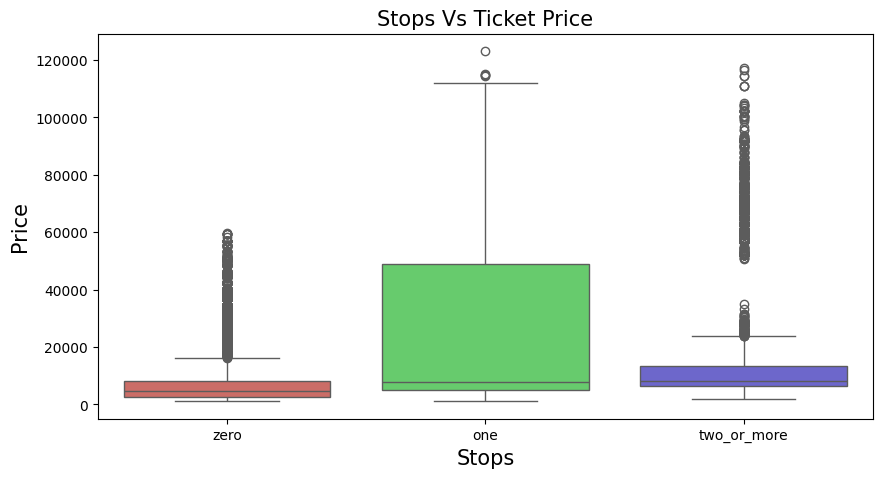

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=data,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<ipython-input-109-e230e8bbbe30>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='destination_city',y='price',data=data,palette='hls')


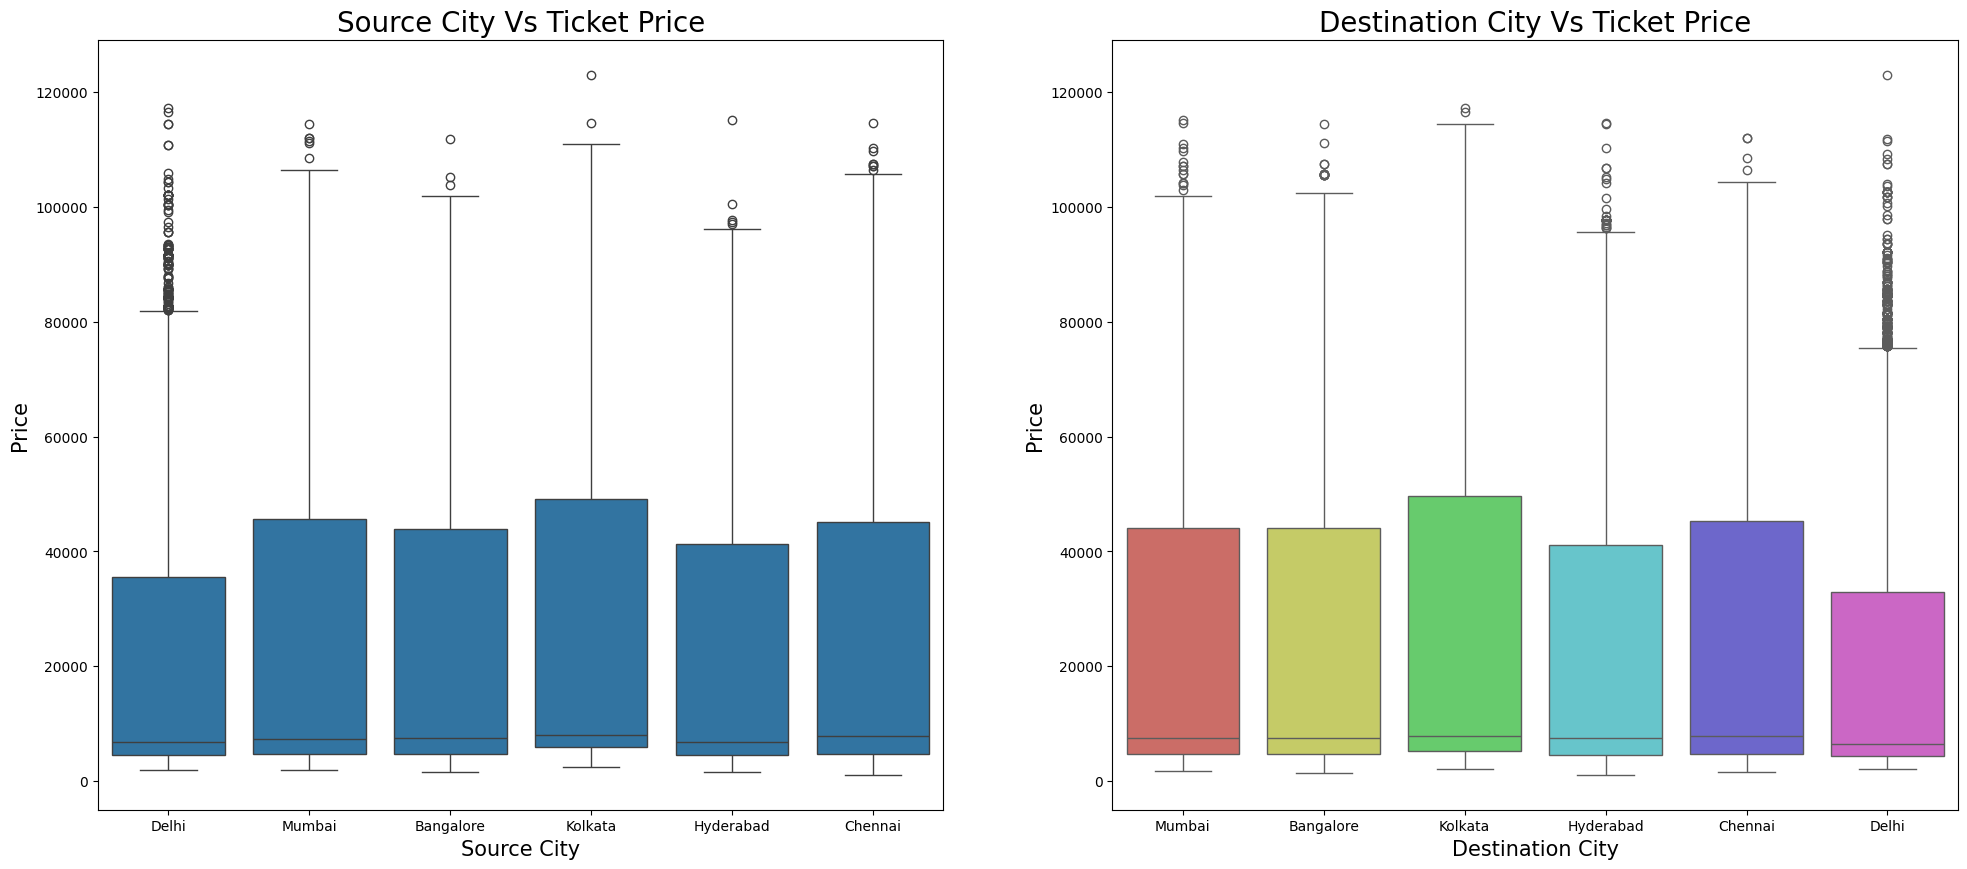

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=data)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=data,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [ ]:
data.head()

,airline,source_city,stops,destination_city,class,days_left,price
0,GO_FIRST,Delhi,zero,Mumbai,Economy,1,5954
1,GO_FIRST,Delhi,zero,Mumbai,Economy,1,5954
2,Indigo,Delhi,zero,Mumbai,Economy,1,5955
3,Indigo,Delhi,zero,Mumbai,Economy,1,5955
4,Indigo,Delhi,zero,Mumbai,Economy,1,5955


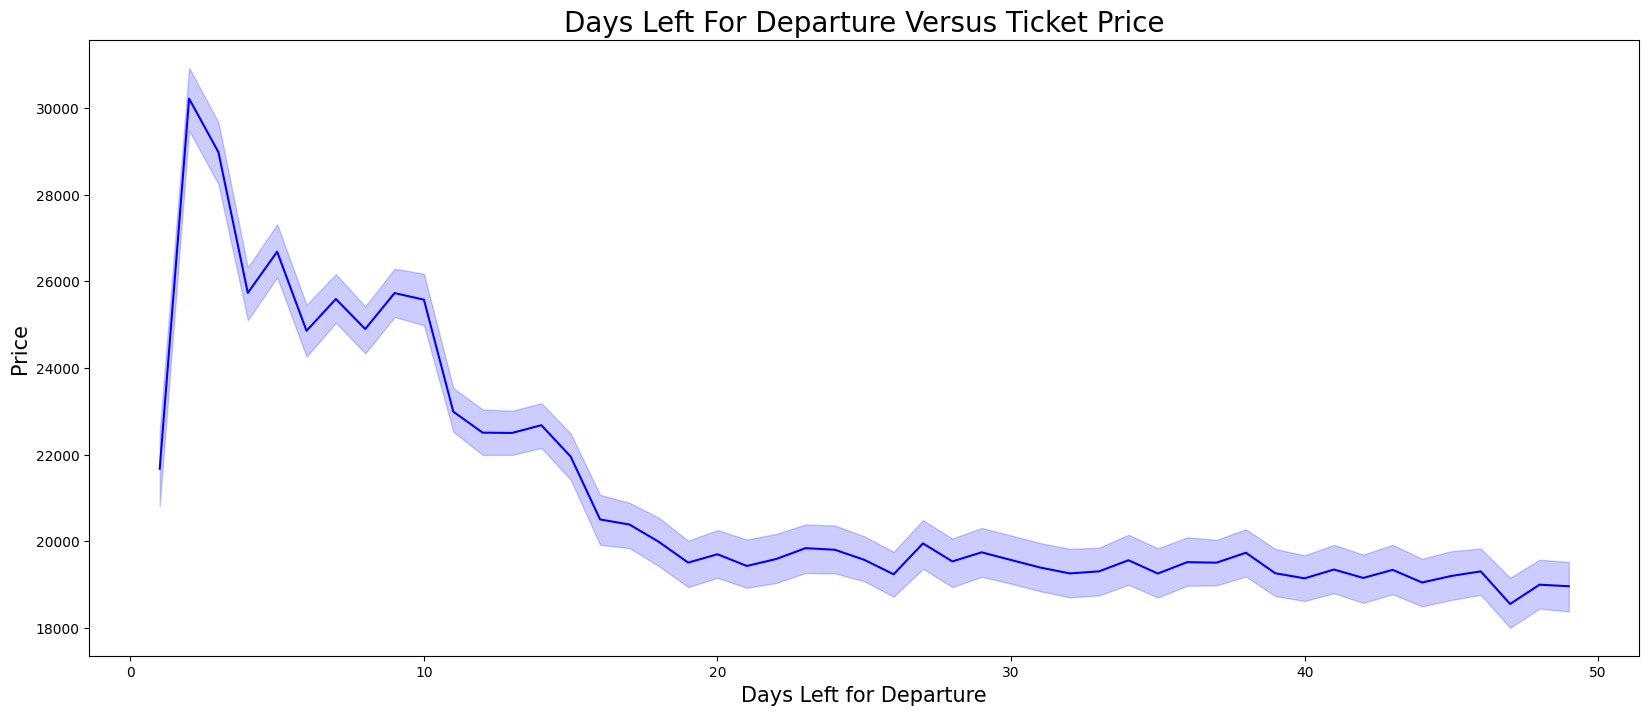

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

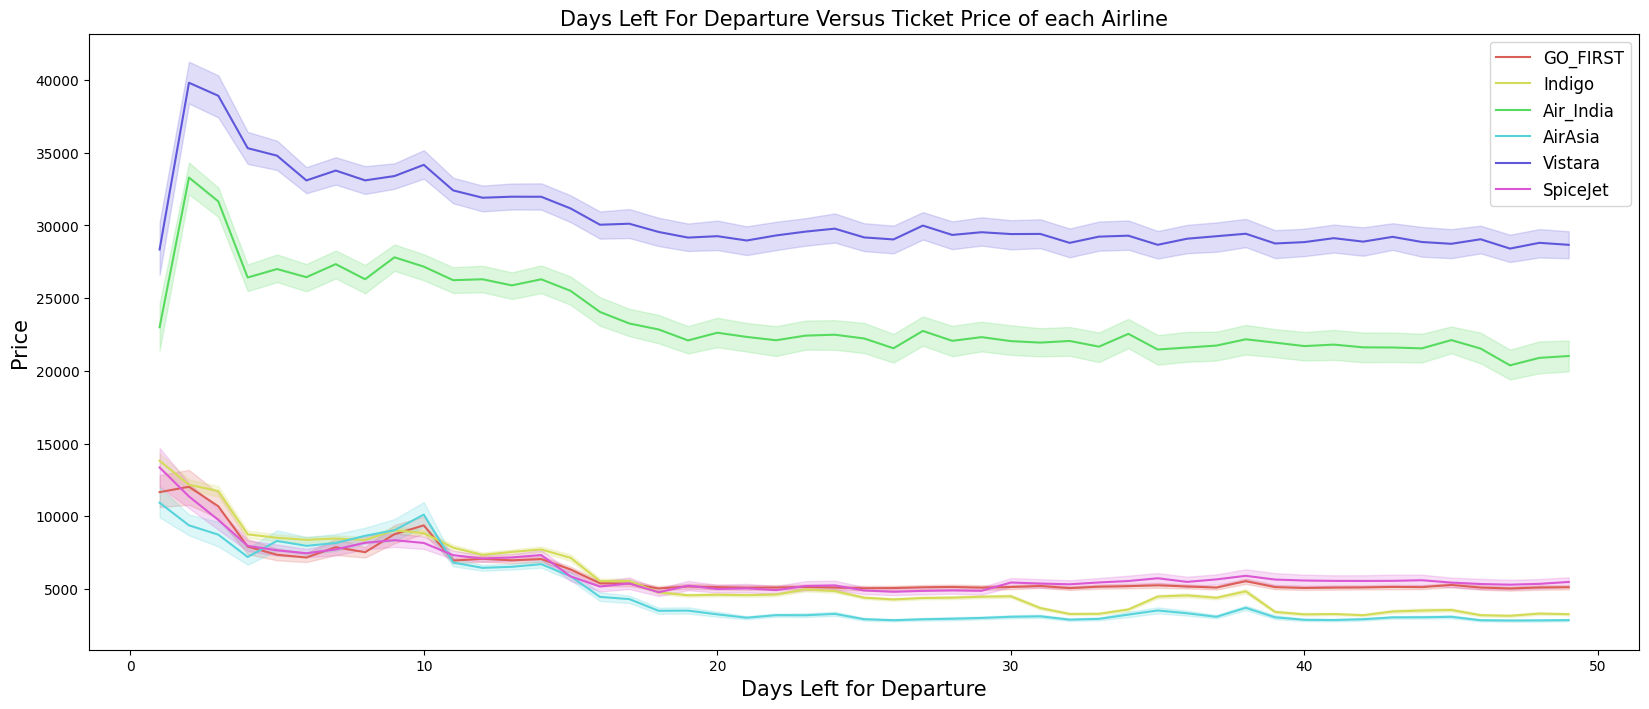

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [ ]:
data.groupby(['source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False).count().head(10)

,source_city,destination_city,airline,class,stops,days_left,price
0,Bangalore,Chennai,8,8,8,8,8
1,Bangalore,Delhi,8,8,8,8,8
2,Bangalore,Hyderabad,8,8,8,8,8
3,Bangalore,Kolkata,8,8,8,8,8
4,Bangalore,Mumbai,8,8,8,8,8
5,Chennai,Bangalore,8,8,8,8,8
6,Chennai,Delhi,8,8,8,8,8
7,Chennai,Hyderabad,8,8,8,8,8
8,Chennai,Kolkata,8,8,8,8,8
9,Chennai,Mumbai,8,8,8,8,8


In [ ]:
data.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [ ]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=le.fit_transform(data[col])

In [ ]:
data.head()

,airline,source_city,stops,destination_city,class,days_left,price
0,2,2,2,5,1,1,5954
1,2,2,2,5,1,1,5954
2,3,2,2,5,1,1,5955
3,3,2,2,5,1,1,5955
4,3,2,2,5,1,1,5955


In [ ]:
data.dropna(inplace=True)

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

airline             0
source_city         0
stops               0
destination_city    0
class               0
days_left           0
price               0
dtype: int64


In [ ]:
# storing the Dependent Variables in X and Independent Variable in Y
x=data.drop(['price'],axis=1)
y=data['price']

In [ ]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((240112, 6), (60028, 6), (240112,), (60028,))

In [ ]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [ ]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

airline             0
source_city         0
stops               0
destination_city    0
class               0
days_left           0
price               0
dtype: int64


Model Name:  LinearRegression()


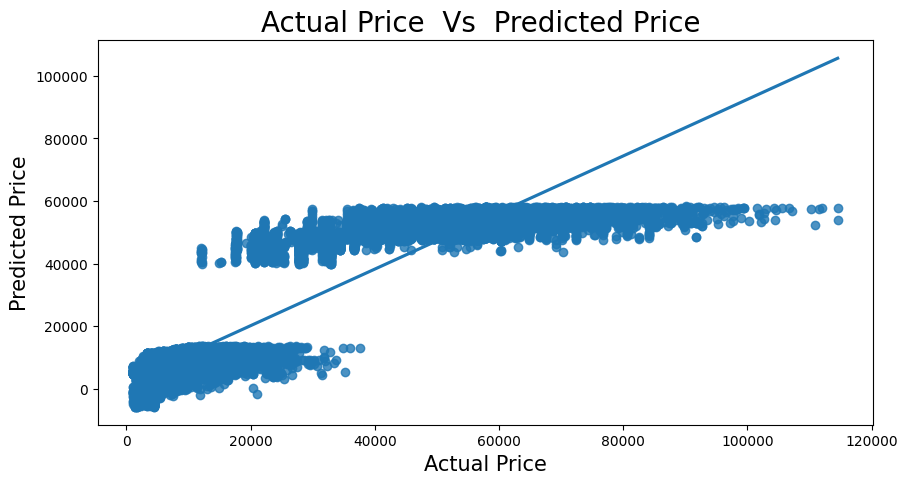

Mean Absolute Error (MAE): 4665.026
Mean Squared Error (MSE): 49569204.883
Root Mean Squared Error (RMSE): 7040.54
R2_score: 0.903252
Root Mean Squared Log Error (RMSLE): 8.859
Mean Absolute Percentage Error (MAPE): 44.43 %
Adj R Square:  0.90325
------------------------------------------------------------------------------------------------------------


<ipython-input-130-1d13eb8de512>:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  DecisionTreeRegressor()


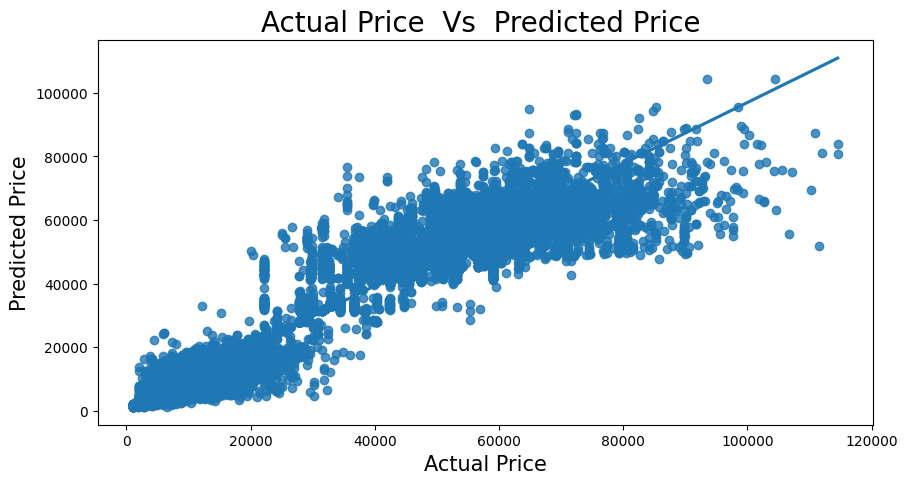

Mean Absolute Error (MAE): 2487.619
Mean Squared Error (MSE): 21605426.826
Root Mean Squared Error (RMSE): 4648.164
R2_score: 0.957831
Root Mean Squared Log Error (RMSLE): 8.444
Mean Absolute Percentage Error (MAPE): 14.74 %
Adj R Square:  0.95783
------------------------------------------------------------------------------------------------------------


<ipython-input-130-1d13eb8de512>:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()


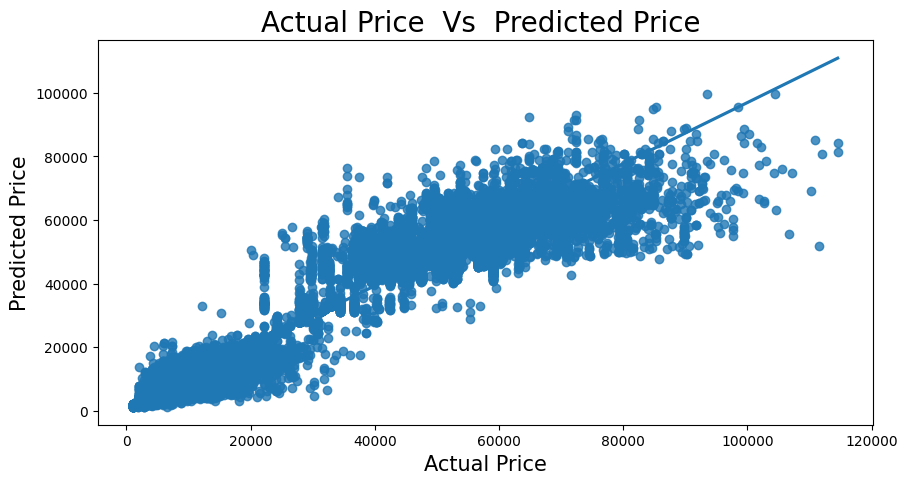

Mean Absolute Error (MAE): 2485.947
Mean Squared Error (MSE): 21535756.862
Root Mean Squared Error (RMSE): 4640.663
R2_score: 0.957967
Root Mean Squared Log Error (RMSLE): 8.443
Mean Absolute Percentage Error (MAPE): 14.71 %
Adj R Square:  0.957966
------------------------------------------------------------------------------------------------------------


<ipython-input-130-1d13eb8de512>:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  KNeighborsRegressor()


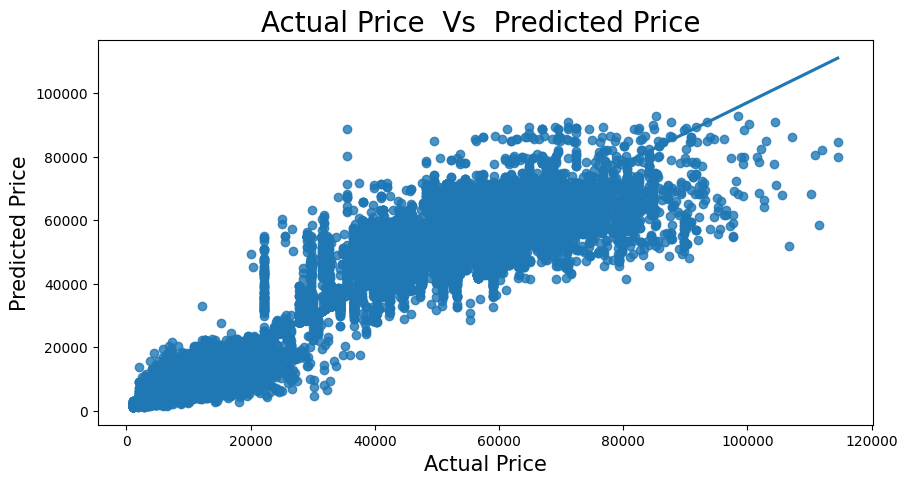

Mean Absolute Error (MAE): 2656.686
Mean Squared Error (MSE): 24925626.462
Root Mean Squared Error (RMSE): 4992.557
R2_score: 0.951351
Root Mean Squared Log Error (RMSLE): 8.516
Mean Absolute Percentage Error (MAPE): 15.69 %
Adj R Square:  0.95135
------------------------------------------------------------------------------------------------------------


<ipython-input-130-1d13eb8de512>:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  GradientBoostingRegressor()


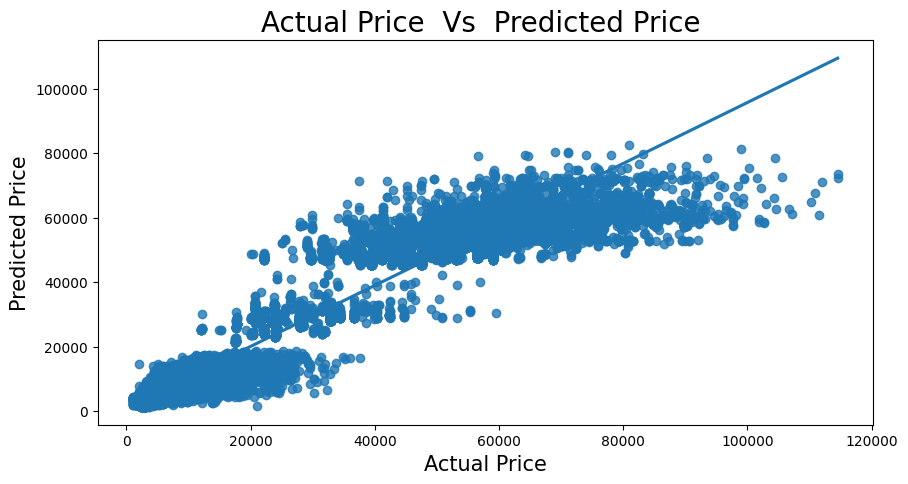

Mean Absolute Error (MAE): 3078.33
Mean Squared Error (MSE): 26810777.993
Root Mean Squared Error (RMSE): 5177.913
R2_score: 0.947671
Root Mean Squared Log Error (RMSLE): 8.552
Mean Absolute Percentage Error (MAPE): 21.68 %
Adj R Square:  0.94767
------------------------------------------------------------------------------------------------------------


<ipython-input-130-1d13eb8de512>:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


In [ ]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
#modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
#modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
#modelETR = ExtraTreesRegressor()
#modelRE=Ridge()
#modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelGBR]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    plt.figure(figsize=(10,5))
    sns.regplot(x=y_test,y=y_pred,data=Results)
    plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
    plt.xlabel('Actual Price',fontsize=15)
    plt.ylabel('Predicted Price',fontsize=15)
    plt.show()



    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

In [ ]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4665.026268,0.903250,7040.540099,44.426373,4.956920e+07,8.859440,0.903252
1,DecisionTreeRegressor(),2487.503041,0.957833,4648.025500,14.739978,2.160414e+07,8.444198,0.957834
2,"(DecisionTreeRegressor(max_features=1.0, rando...",2485.276010,0.957970,4640.444631,14.714644,2.153373e+07,8.442565,0.957971
3,KNeighborsRegressor(),2656.685867,0.951350,4992.557107,15.685538,2.492563e+07,8.515704,0.951351
4,([DecisionTreeRegressor(criterion='friedman_ms...,3078.329695,0.947670,5177.912513,21.681088,2.681078e+07,8.552157,0.947671
